In [63]:
from matplotlib import pyplot as plt

In [68]:
with open(r'training_log_teacher.txt', 'r') as fp: # teacher data
    data_teacher = fp.read()

with open('qv_r10_rslora_ep10training_log_student.txt', 'r') as fp: # student data
    data_student = fp.read()

In [69]:
def extractr_data(data):
    data = data.strip().split('\n')
    train = []
    eval = []

    for line in data:
        cur = line.strip('{}').split(',')
        cur = [item.split(':') for item in cur]

        cur = {item[0].strip().strip('\'\''):float(item[1]) for item in cur}
        # print(cur)
        if 'loss' in cur.keys():
            train.append(cur)
        elif 'eval_loss' in cur.keys():
            eval.append(cur)

    return train, eval

def make_plot(train, eval):
    train_step = [int(item['epoch']*6875) for item in train]
    eval_step = [int(item['epoch']*6875) for item in eval]
    train_loss = [item['loss'] for item in train]
    eval_loss = [item['eval_loss'] for item in eval]
    eval_acc = [item['eval_accuracy'] for item in eval]
    plt.plot(train_step, train_loss, eval_step, eval_loss)
    plt.grid()
    plt.legend(['train_loss', 'eval_loss'])
    plt.xlabel('step')
    plt.ylabel('loss')
    plt.title('Teacher Model Loss vs Step')
    plt.show()

    plt.plot(eval_step, eval_acc)
    plt.title('Teacher Model Accuracy vs Step')
    plt.xlabel('step')
    plt.ylabel('accuracy')
    plt.grid()
    plt.show()

In [70]:
train_teacher, eval_teacher = extractr_data(data_teacher)
train_student, eval_student = extractr_data(data_student)

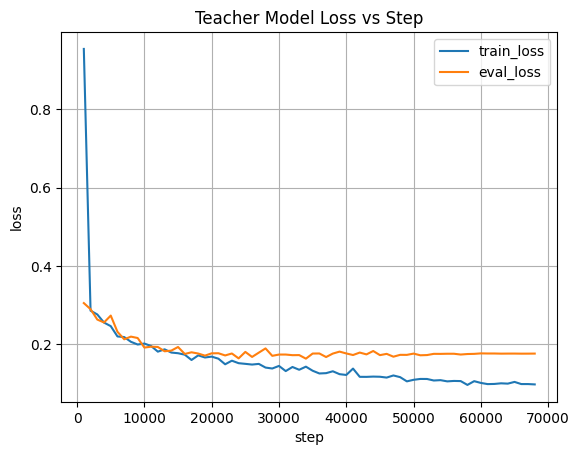

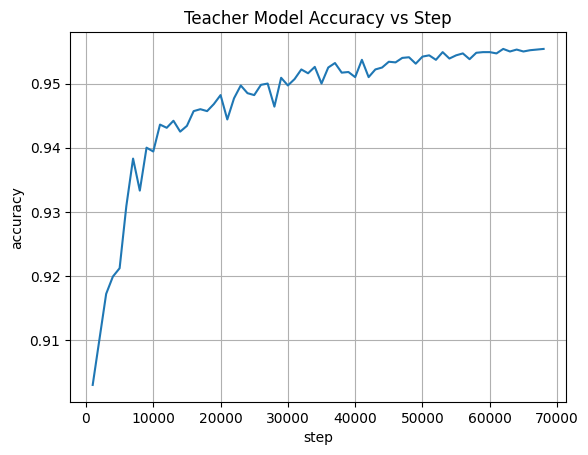

In [71]:
# Plot teacher model training data
make_plot(train_teacher, eval_teacher)

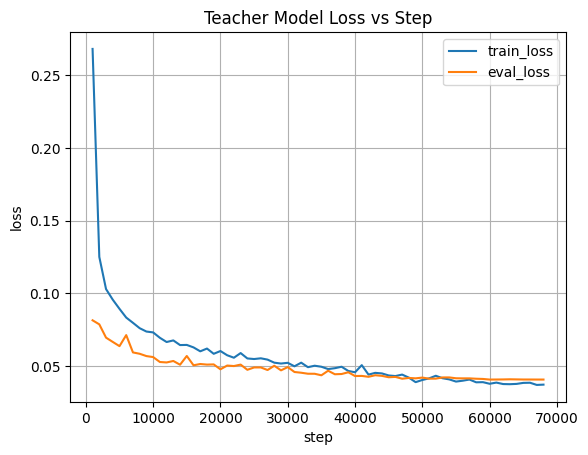

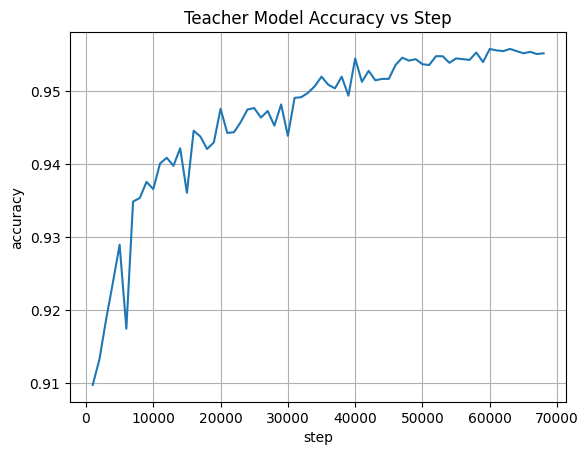

In [72]:
# Plot student model training data
make_plot(train_student, eval_student)